# 1. Pre-processing

### Libraries

In [1]:
import sys
sys.path.append('..')
from _utils.BattLeDIM_utils import *

/Users/ivodaniel/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### Data loading

In [2]:
scada_data = SCADA_data()
path_scada = '../_utils/Data/SCADA_data/2019/'
scada_data.load(path_scada)

### General information

In [3]:
dct_n2dma = dict({'DMA_A':['n54','n105','n114','n163','n188','n288','n296',
                           'n332','n342','n410','n415','n429','n458','n469',
                           'n495','n506','n516','n519','n549','n613','n636',
                           'n644','n679','n722', 'n726','n740','n752','n769'],
                  'DMA_B':['n215','n229'],
                  'DMA_C':['n1','n4','n31'],
                  'AMR_n':['n1','n2','n3','n4','n6','n7','n8','n9','n10','n11','n13',
                           'n16','n17','n18','n19','n20','n21','n22','n23','n24','n25',
                           'n26','n27','n28','n29','n30','n31','n32','n33','n34','n35',
                           'n36','n39','n40','n41','n42','n43','n44','n45',
                           'n343','n344','n345','n346','n347','n349','n350','n351','n352',
                           'n353','n354','n355','n356','n357','n358','n360','n361','n362',
                           'n364','n365','n366','n367','n368','n369','n370','n371','n372',
                           'n373','n374','n375','n376','n377','n378','n379','n381','n382',
                           'n383','n384','n385','n386','n387','n388','n389']})

In [4]:
sampling_rate='5min'

In [5]:
detections = dict()

### Ground truth

In [6]:
path_ground_truth = '../_utils/Data/leak_ground_truth/2019_Leakages.csv'
leak_signals, df_overview = load_trajectories_true(path_ground_truth)
df_overview = df_overview.T

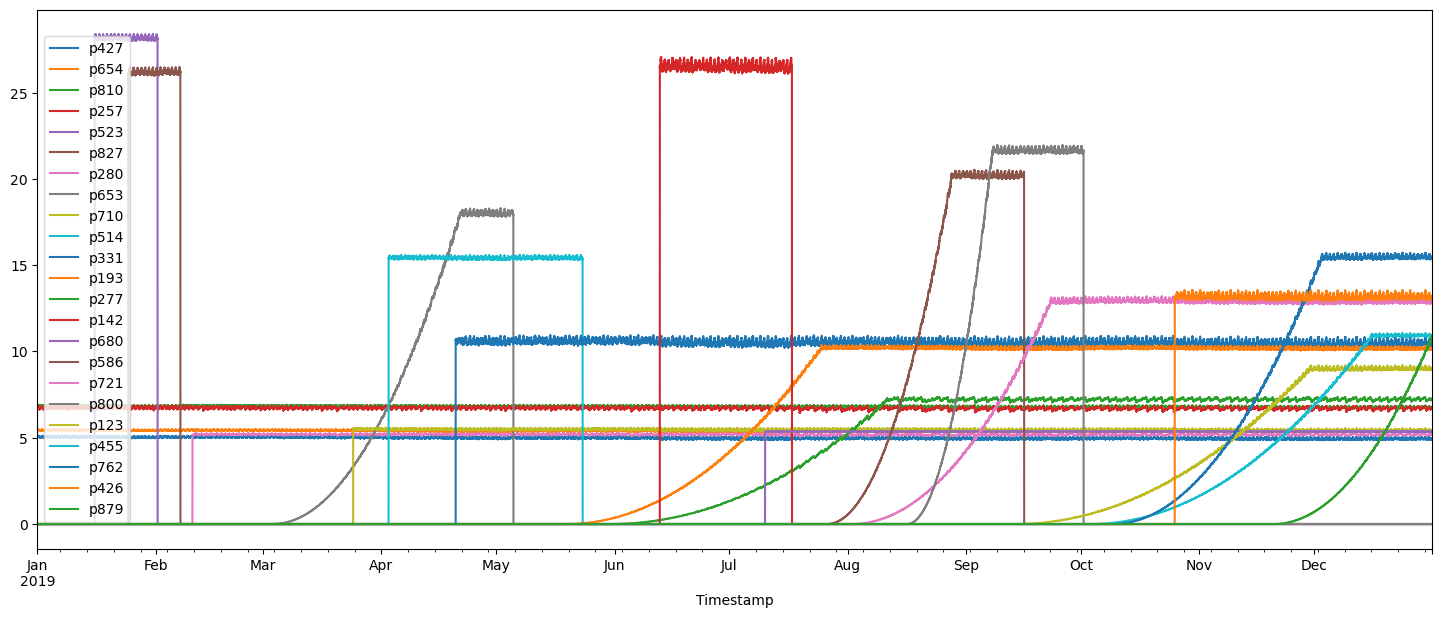

In [7]:
plt.style.use(['default'])
f,ax = plt.subplots(1,sharex=True,sharey=True,figsize=(18,7))
locator = mdates.AutoDateLocator(minticks=7, maxticks=15)
formatter = mdates.ConciseDateFormatter(locator)
formatter.offset_formats[2] = '%Y'

lc = leak_signals.plot(ax=ax)

# 2. Analysis

### General analysis

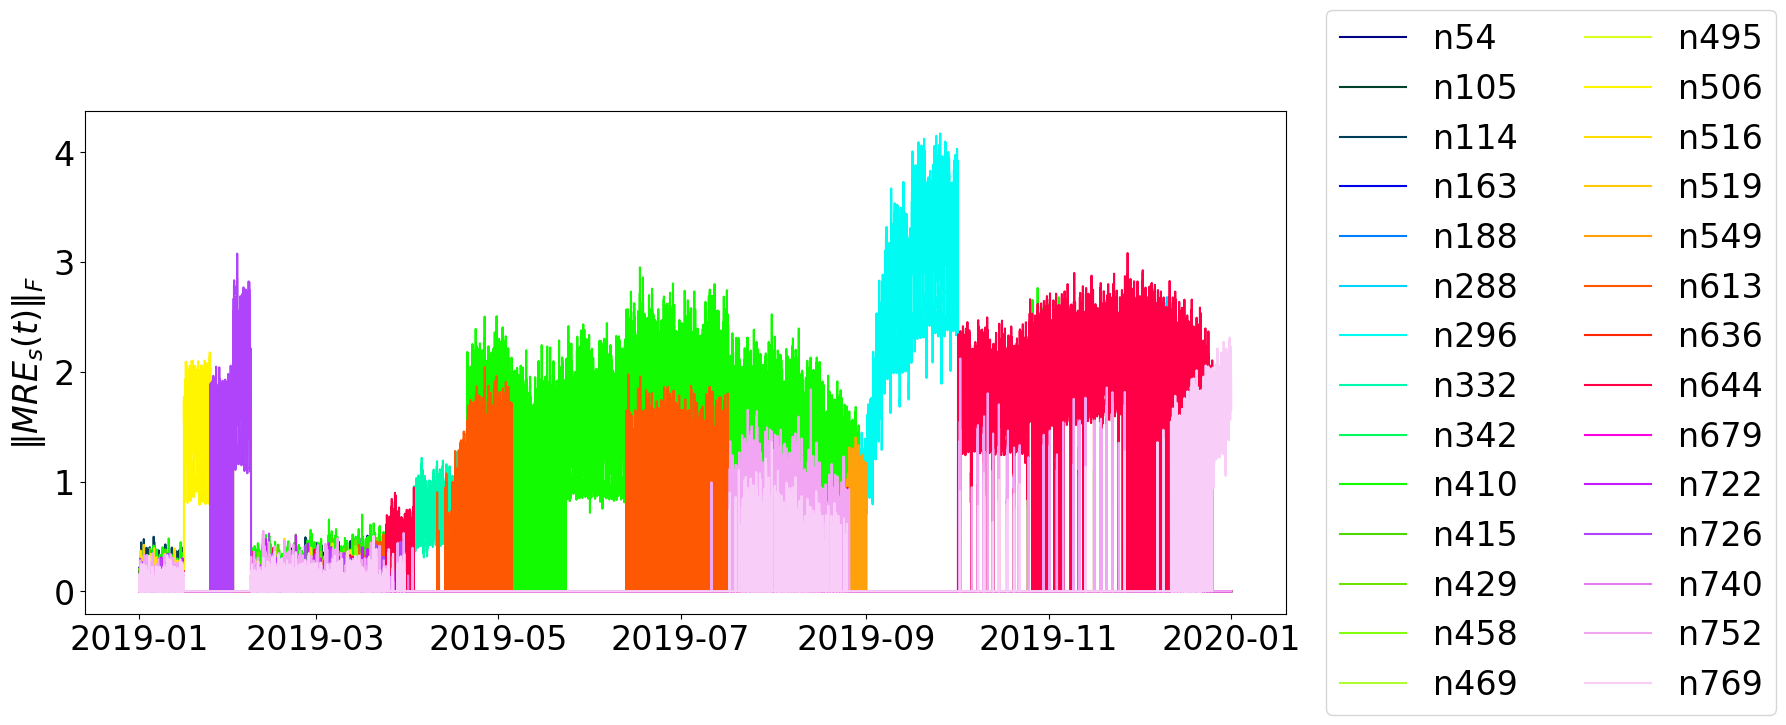

In [8]:
cor_time_frame = ['2019-01-01 00:00','2019-01-10 00:00']
MRE_A = leak_analysis(dct_n2dma['DMA_A'],scada_data,cor_time_frame)
plot_MRE(MRE_A)

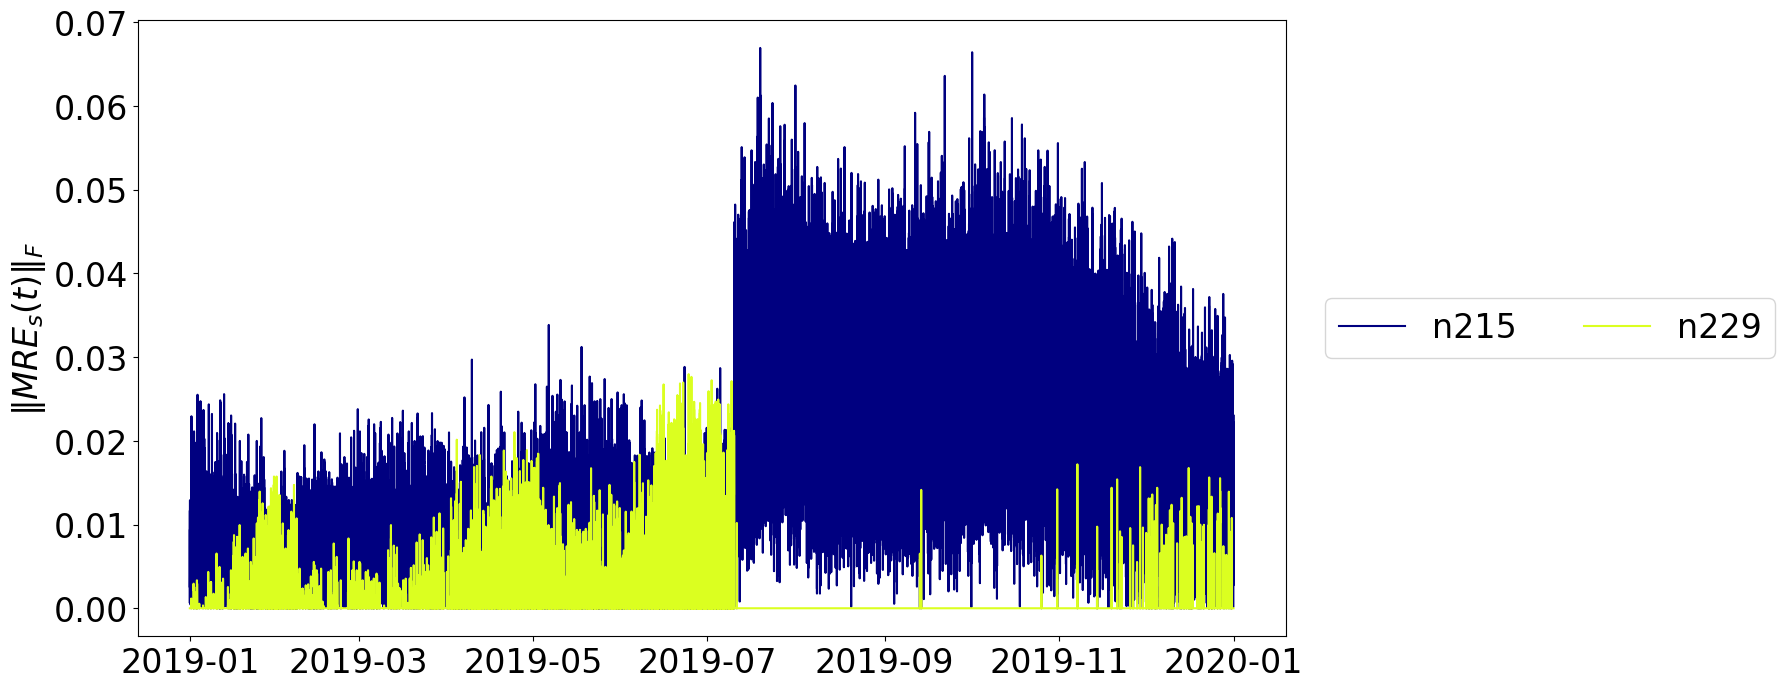

In [9]:
cor_time_frame = ['2019-06-15 00:00','2019-06-30 00:00']
MRE_B = leak_analysis(dct_n2dma['DMA_B'],scada_data,cor_time_frame)
plot_MRE(MRE_B)

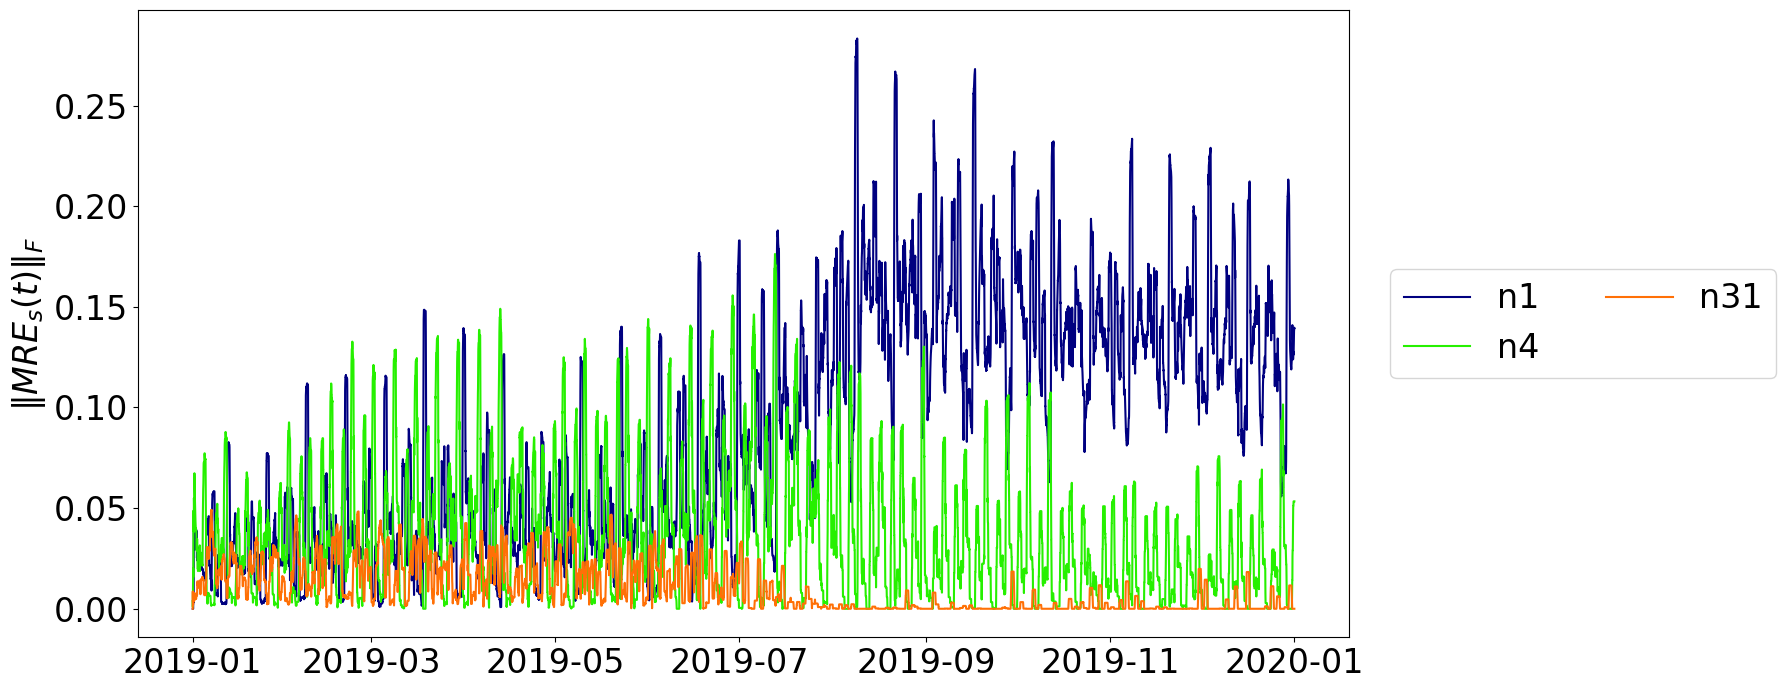

In [10]:
cor_time_frame = ['2019-01-01 00:00','2019-01-15 00:00']
MRE_C = leak_analysis(dct_n2dma['DMA_C'],scada_data,cor_time_frame)
plot_MRE(MRE_C,roll='D')

### Leak 1

Leak detected on 2019-01-15 23:00:00
True leak start on 2019-01-15 23:00:00
Time to detection 0 days 00:00:00


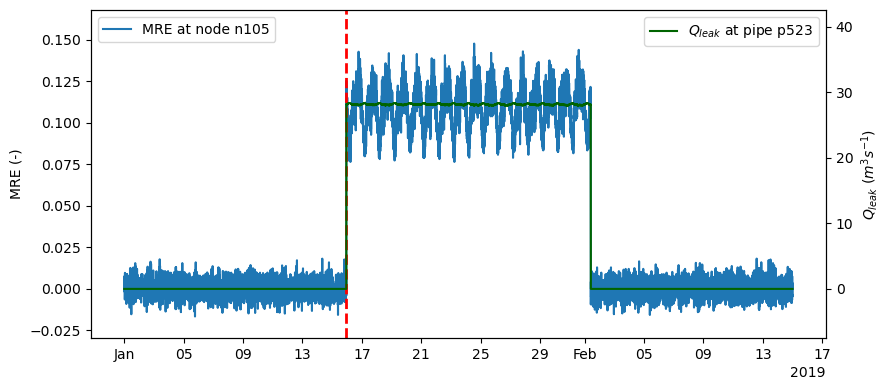

In [11]:
# general information
node_MAS = 'n506'
closest_nodes = ['n105']
pipe_id = 'p523'

# calibration time frame
time_frame_list = [['2019-01-01 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-01-24 18:25'], 
                   ['2019-01-24 18:30','2019-02-03 00:00','2019-02-06 00:00','2019-02-07 09:05'], 
                   ['2019-02-07 09:10','2019-01-05 00:00','2019-01-09 00:00','2019-02-15 00:00']]

# linear regression analysis
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)

# change point detection 
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])

# saving the detection
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}

# writing time to detection and leaked volume to 'df_overview'
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12

# printing results
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))

# plotting results
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 2

Leak detected on 2019-01-24 18:30:00
True leak start on 2019-01-24 18:30:00
Time to detection 0 days 00:00:00


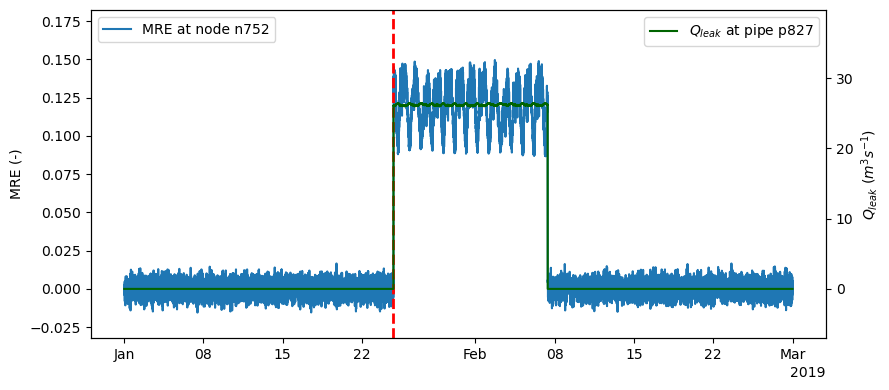

In [12]:
node_MAS = 'n726'
closest_nodes = ['n752']
pipe_id = 'p827'

time_frame_list = [['2019-01-01 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-01-15 22:55'],
                   ['2019-01-15 23:00','2019-01-18 00:00','2019-01-20 00:00','2019-02-01 09:50'],
                   ['2019-02-01 09:55','2019-01-05 00:00','2019-01-09 00:00','2019-03-01 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 3

Leak detected on 2019-02-15 09:15:00
True leak start on 2019-02-10 13:05:00
Time to detection 4 days 20:10:00


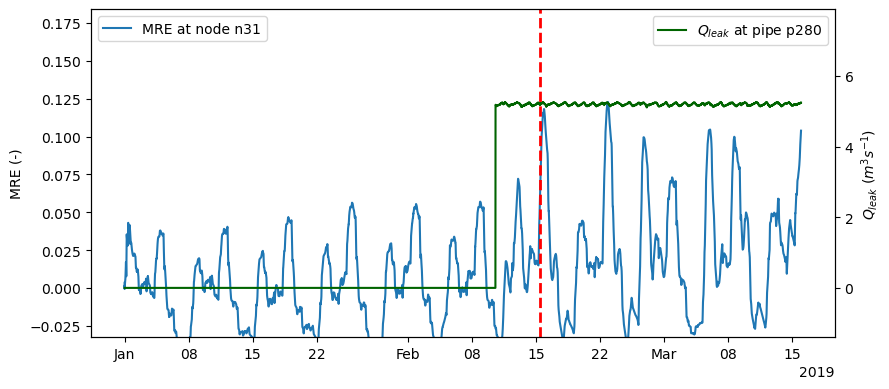

In [13]:
node_MAS = 'n4'
closest_nodes = ['n31']
pipe_id = 'p280'

time_frame_list = [['2019-01-01 00:00','2019-01-15 00:00','2019-01-30 00:00','2019-03-15 22:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]], delta=1, C_thr=300, est_length='7 days')
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],roll='D',
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 4

Leak detected on 2019-03-12 19:40:00
True leak start on 2019-03-03 13:10:00
Time to detection 9 days 06:30:00


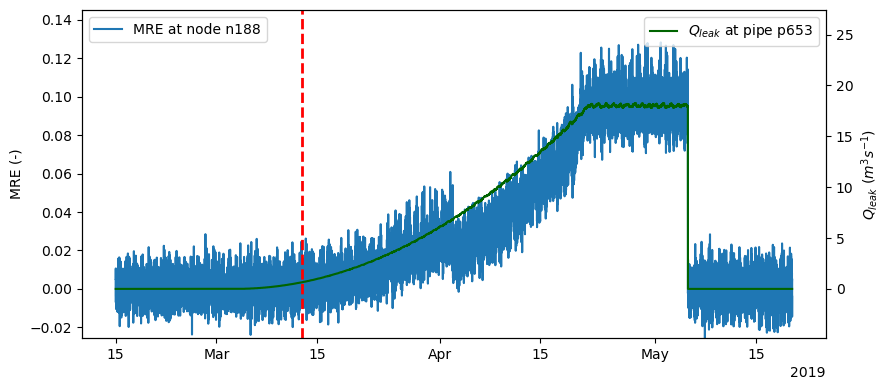

In [14]:
node_MAS = 'n613'
closest_nodes = ['n188']
pipe_id = 'p653'

time_frame_list = [['2019-02-15 00:00','2019-01-05 00:00','2019-01-09 00:00','2019-04-02 20:35'],
                   ['2019-04-02 20:40','2019-05-08 00:00','2019-05-15 00:00','2019-05-20 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 5

Leak detected on 2019-03-24 16:15:00
True leak start on 2019-03-24 14:15:00
Time to detection 0 days 02:00:00


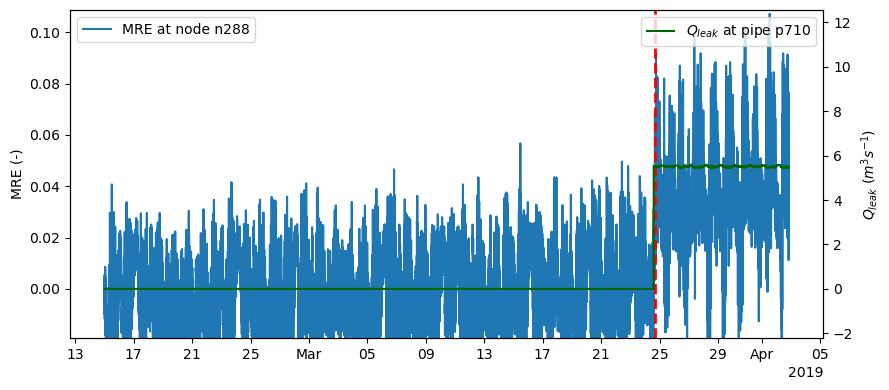

In [15]:
node_MAS = 'n644'
closest_nodes = ['n288']
pipe_id = 'p710'

time_frame_list = [['2019-02-15 00:00','2019-03-10 00:00','2019-03-19 00:00','2019-04-02 20:35']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 6

Leak detected on 2019-04-02 20:50:00
True leak start on 2019-04-02 20:40:00
Time to detection 0 days 00:10:00


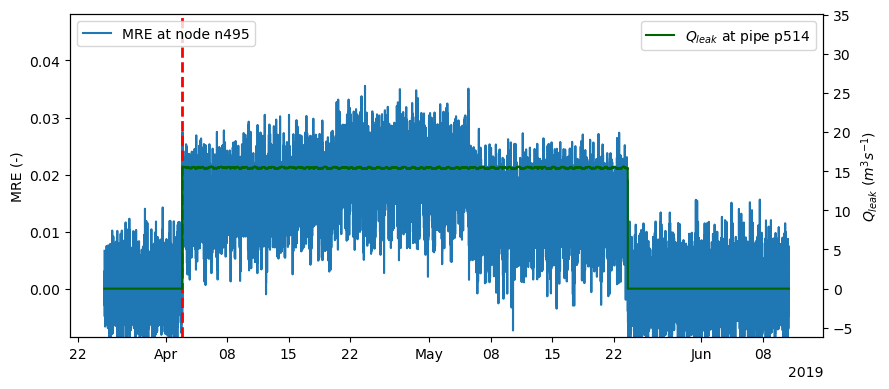

In [16]:
node_MAS = 'n332'
closest_nodes = ['n495']
pipe_id = 'p514'

time_frame_list = [['2019-03-25 00:00','2019-03-27 00:00','2019-03-31 00:00','2019-04-20 14:20'],
                   ['2019-04-20 14:25','2019-05-25 00:00','2019-05-30 00:00','2019-06-10 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 7

Leak detected on 2019-04-20 10:10:00
True leak start on 2019-04-20 10:10:00
Time to detection 0 days 00:00:00


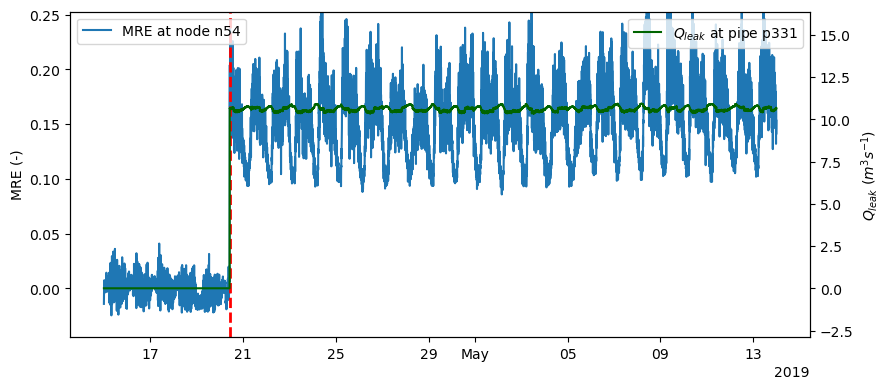

In [17]:
node_MAS = 'n410'
closest_nodes = ['n54']
pipe_id = 'p331'

time_frame_list = [['2019-04-15 00:00','2019-04-15 00:00','2019-04-20 00:00','2019-05-14 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 8

Leak detected on 2019-06-16 13:25:00
True leak start on 2019-05-19 10:40:00
Time to detection 28 days 02:45:00


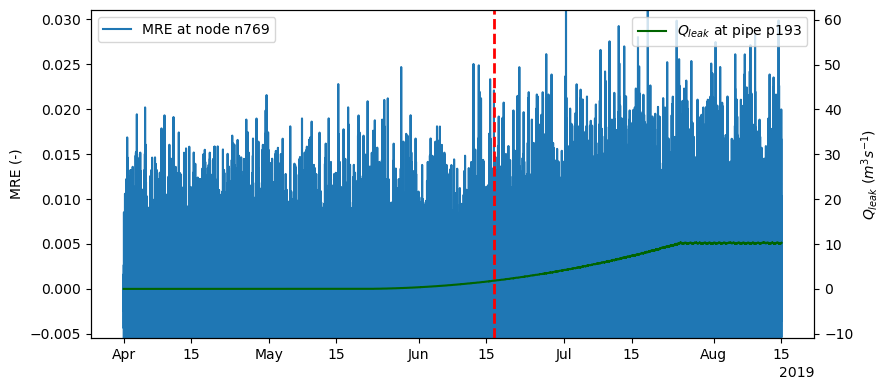

In [18]:
node_MAS = 'n752'
closest_nodes = ['n769']
pipe_id = 'p193'

time_frame_list = [['2019-04-01 00:00','2019-04-01 00:00','2019-05-09 00:00','2019-08-15 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=4)

### Leak 9

Leak detected on 2019-07-15 18:25:00
True leak start on 2019-05-30 21:55:00
Time to detection 45 days 20:30:00


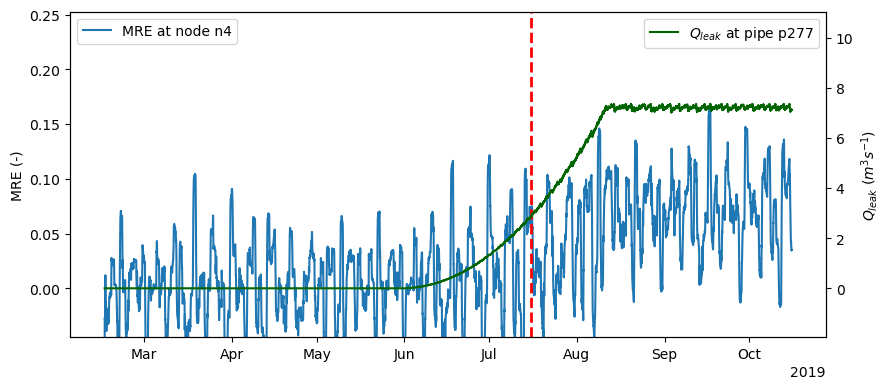

In [19]:
node_MAS = 'n1'
closest_nodes = ['n4']
pipe_id = 'p277'

time_frame_list = [['2019-02-15 00:00','2019-03-01 00:00','2019-04-20 00:00','2019-10-15 22:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]], delta=1, C_thr=300, est_length='14 days')
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],roll='D',
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 10

Leak detected on 2019-06-12 19:55:00
True leak start on 2019-06-12 19:55:00
Time to detection 0 days 00:00:00


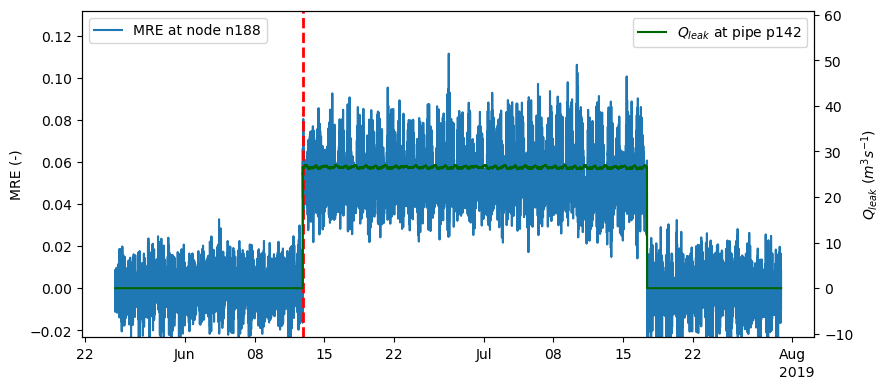

In [20]:
node_MAS = 'n613'
closest_nodes = ['n188']
pipe_id = 'p142'

time_frame_list = [['2019-05-25 00:00','2019-05-30 00:00','2019-06-05 00:00','2019-07-10 10:10'],
                   ['2019-07-10 10:10','2019-07-22 00:00','2019-07-24 00:00','2019-07-30 20:30']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 11

Leak detected on 2019-07-10 09:50:00
True leak start on 2019-07-10 08:45:00
Time to detection 0 days 01:05:00


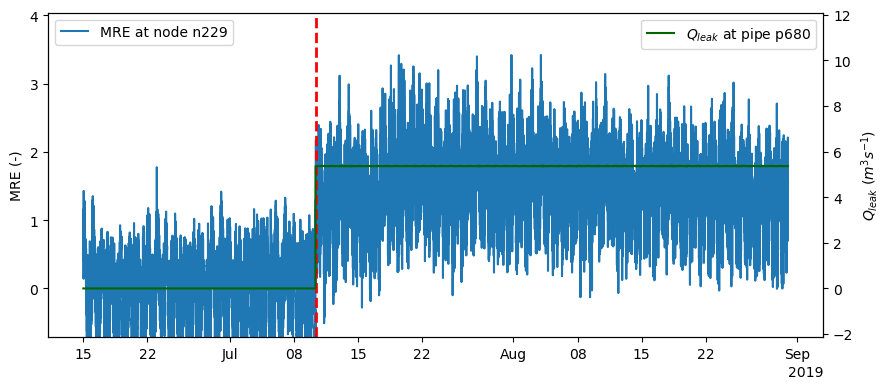

In [21]:
node_MAS = 'n215'
closest_nodes = ['n229']
pipe_id = 'p680'

time_frame_list = [['2019-06-15 00:00','2019-06-15 00:00','2019-06-30 00:00','2019-08-31 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 12

Leak detected on 2019-08-06 22:40:00
True leak start on 2019-07-26 14:40:00
Time to detection 11 days 08:00:00


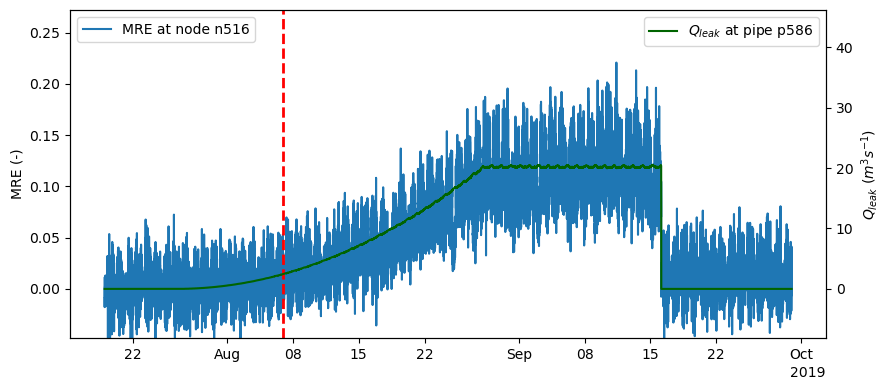

In [22]:
node_MAS = 'n549'
closest_nodes = ['n516']
pipe_id = 'p586'

time_frame_list = [['2019-07-19 00:00','2019-07-19 00:00','2019-07-25 00:00','2019-09-30 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 13

Leak detected on 2019-08-13 13:00:00
True leak start on 2019-08-02 03:00:00
Time to detection 11 days 10:00:00


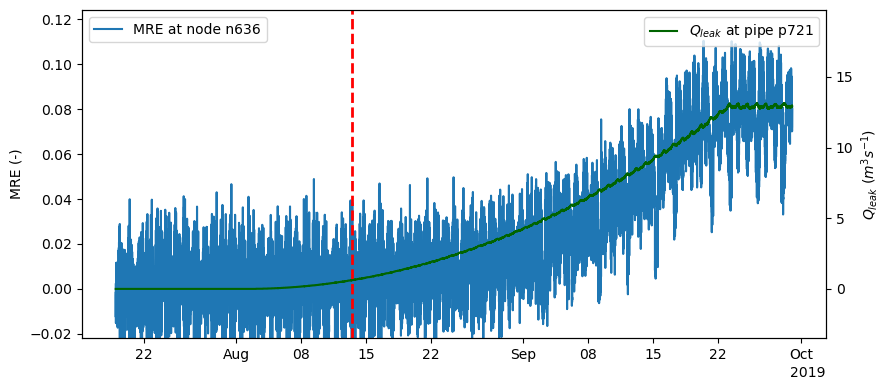

In [23]:
node_MAS = 'n644'
closest_nodes = ['n636']
pipe_id = 'p721'

time_frame_list = [['2019-07-19 00:00','2019-07-19 00:00','2019-07-25 00:00','2019-09-30 00:00']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 14

Leak detected on 2019-08-21 10:30:00
True leak start on 2019-08-16 14:00:00
Time to detection 4 days 20:30:00


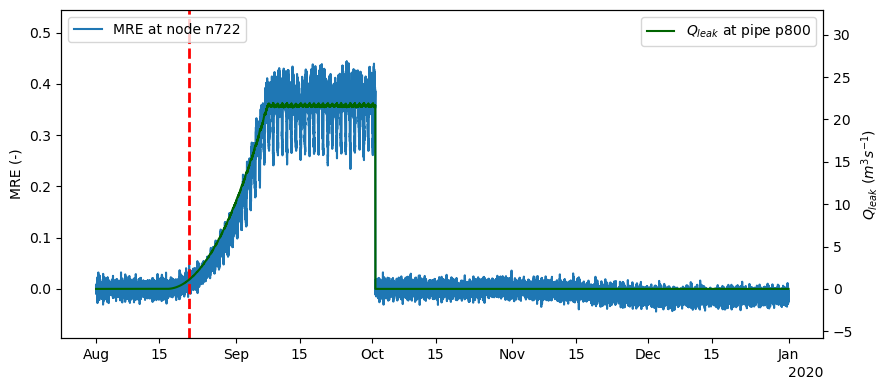

In [24]:
node_MAS = 'n296'
closest_nodes = ['n722']
pipe_id = 'p800'

time_frame_list = [['2019-08-01 00:00','2019-08-01 00:00','2019-08-09 00:00','2019-09-16 03:20'],
                   ['2019-09-16 03:20','2019-10-05 00:00','2019-10-09 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 15

Leak detected on 2019-10-24 10:10:00
True leak start on 2019-09-13 20:05:00
Time to detection 40 days 14:05:00


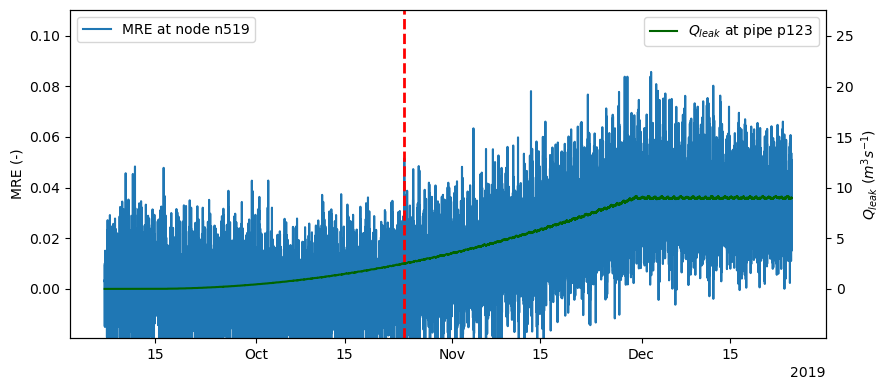

In [25]:
node_MAS = 'n163'
closest_nodes = ['n519']
pipe_id = 'p123'

time_frame_list = [['2019-09-07 00:00','2019-09-07 00:00','2019-09-12 00:00','2019-12-24 18:25']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=2)

### Leak 16

Leak detected on 2019-11-03 18:05:00
True leak start on 2019-10-03 14:00:00
Time to detection 31 days 04:05:00


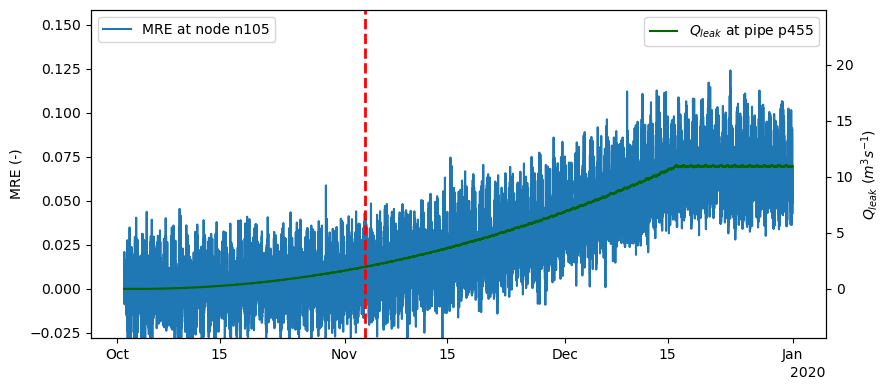

In [26]:
node_MAS = 'n114'
closest_nodes = ['n105']
pipe_id = 'p455'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0],zoom_factor=1.5)

### Leak 17

Leak detected on 2019-10-25 13:30:00
True leak start on 2019-10-09 10:15:00
Time to detection 16 days 03:15:00


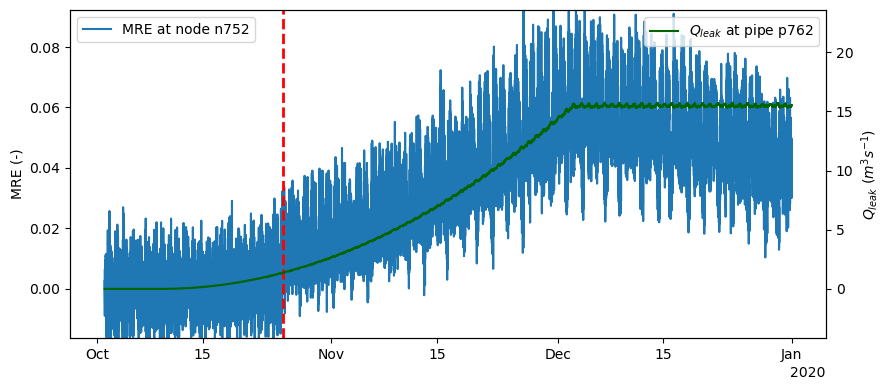

In [27]:
node_MAS = 'n288'
closest_nodes = ['n752']
pipe_id = 'p762'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 18

Leak detected on 2019-10-25 13:40:00
True leak start on 2019-10-25 13:25:00
Time to detection 0 days 00:15:00


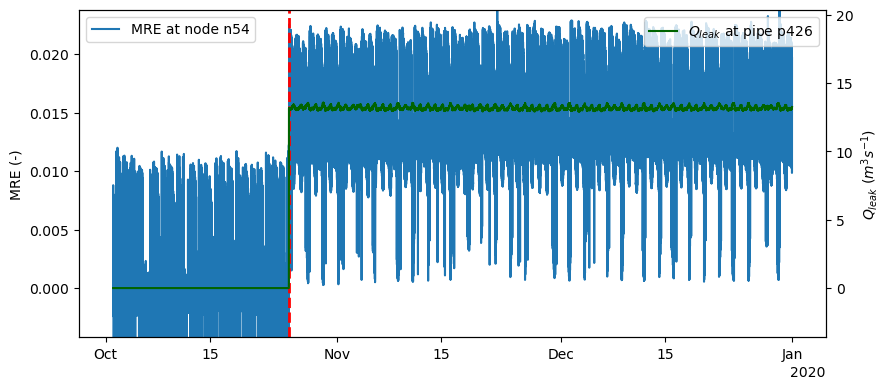

In [28]:
node_MAS = 'n429'
closest_nodes = ['n54']
pipe_id = 'p426'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-05 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

### Leak 19

Leak detected on 2019-11-22 08:10:00
True leak start on 2019-11-20 11:55:00
Time to detection 1 days 20:15:00


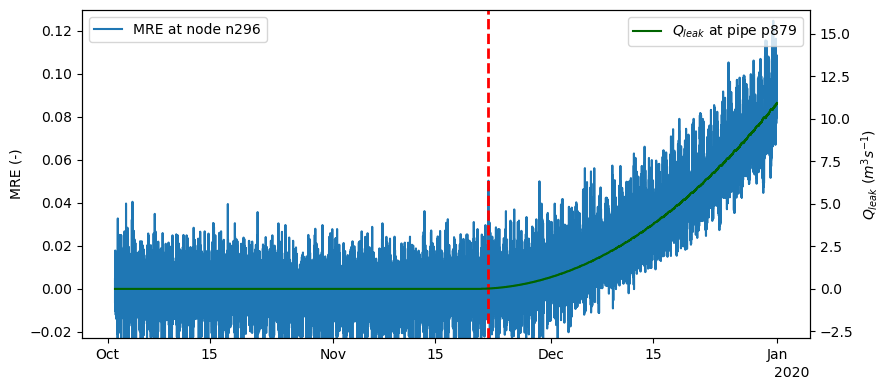

In [29]:
node_MAS = 'n740'
closest_nodes = ['n296']
pipe_id = 'p879'

time_frame_list = [['2019-10-02 00:00','2019-10-02 00:00','2019-10-09 00:00','2019-12-31 23:55']]
MRE = leak_analysis_individual(scada_data,node_MAS,closest_nodes,time_frame_list)
CUSUM = cusum(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]])
detections[pipe_id] = {'MAS':node_MAS,'signal':MRE,'ToD':CUSUM[0],'cusum':CUSUM[1]}
df_overview.loc[pipe_id,'delta_t_cusum'] = (CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])
df_overview.loc[pipe_id,'delta_v_cusum'] = leak_signals[pipe_id].cumsum().loc[:str(CUSUM[0][0])][-2]/12
print('Leak detected on {}'.format(str(CUSUM[0][0])))
print('True leak start on {}'.format(str(df_overview['leak_start'].loc[pipe_id])))
print('Time to detection {}'.format(str(CUSUM[0][0]-df_overview['leak_start'].loc[pipe_id])))
plot_MRE(MRE.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         ground_truth=leak_signals.loc[time_frame_list[0][0]:time_frame_list[-1][-1]],
         leak_id=pipe_id,ind=True,ToD=CUSUM[0])

## Summary plot

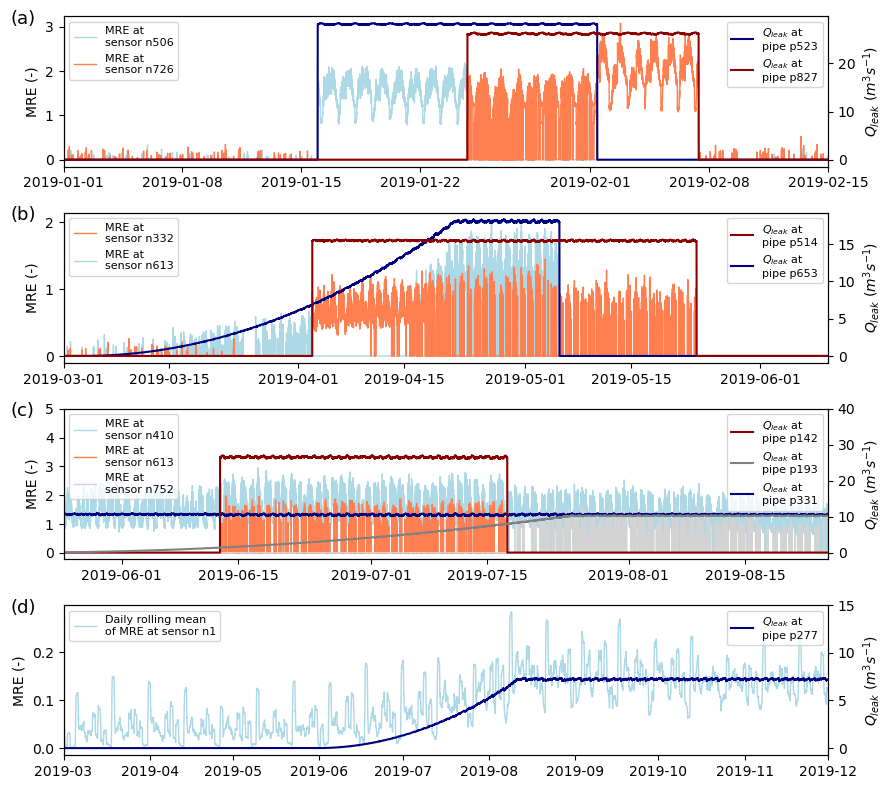

In [73]:
c_MAS = ['lightblue','coral','lightgrey']
c_leak = ['navy','darkred','grey']
leaks = [['p523','p827'],['p653','p514'],['p331','p142','p193'],['p277']]
xlim = [['2019-01','2019-02-15'],['2019-03','2019-06-10'],['2019-05-25','2019-08-25'],['2019-03','2019-12']]
ylim = [[0,0],[0,0],[-0.22,5],[0,0]]
y2lim = [[0,0],[0,0],[-1.8,40],[-0.75,15]]
title = ['a','b','c','d']

f,axs = plt.subplots(4,sharex=False,figsize=(9,8))
for i_ax,ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.offset_formats[2] = '%Y'
    ax.get_xaxis().set_major_locator(locator)
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_xlim(pd.to_datetime(xlim[i_ax][0]),pd.to_datetime(xlim[i_ax][1]))
    ax.set_xlabel('')
    ax.set_ylabel('MRE (-)')
    ax.set_yticks([0,1,2,3,4,5,6])
    ax.text(-0.07,0.95,'({})'.format(title[i_ax]), transform=ax.transAxes,fontsize=13)
    ax2 = ax.twinx()
    ax2.set_ylabel('$Q_{leak}$ ($m^3 s^{-1}$)')
    if i_ax==3:
        ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
        
    for i,leak_id in enumerate(leaks[i_ax]):
        if leak_id =='p277':
            ax.plot(MRE_C[detections[leak_id]['MAS']].rolling('D').mean(),label='Daily rolling mean\nof MRE at sensor {}'.format(detections[leak_id]['MAS']),color=c_MAS[i],lw=1)
        else:
            ax.plot(MRE_A[detections[leak_id]['MAS']],label='MRE at\nsensor {}'.format(detections[leak_id]['MAS']),color=c_MAS[i],lw=1)
        ax2.plot(leak_signals[leak_id],label='$Q_{leak}$ at\npipe %(leak_id)s' %{'leak_id':leak_id},color=c_leak[i])
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc=2, prop={'size':8})
    handles, labels = ax2.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax2.legend(handles, labels, loc=1, prop={'size':8})
    if not (ylim[i_ax][0]==0 and ylim[i_ax][1]==0):
        ax.set_ylim(ylim[i_ax][0],ylim[i_ax][1])
    if not (y2lim[i_ax][0]==0 and y2lim[i_ax][1]==0):
        ax2.set_ylim(y2lim[i_ax][0],y2lim[i_ax][1])

f.tight_layout()
f.savefig('leakage_identification.png',dpi=300)
plt.show()

### Summary of single leakages in DMA A

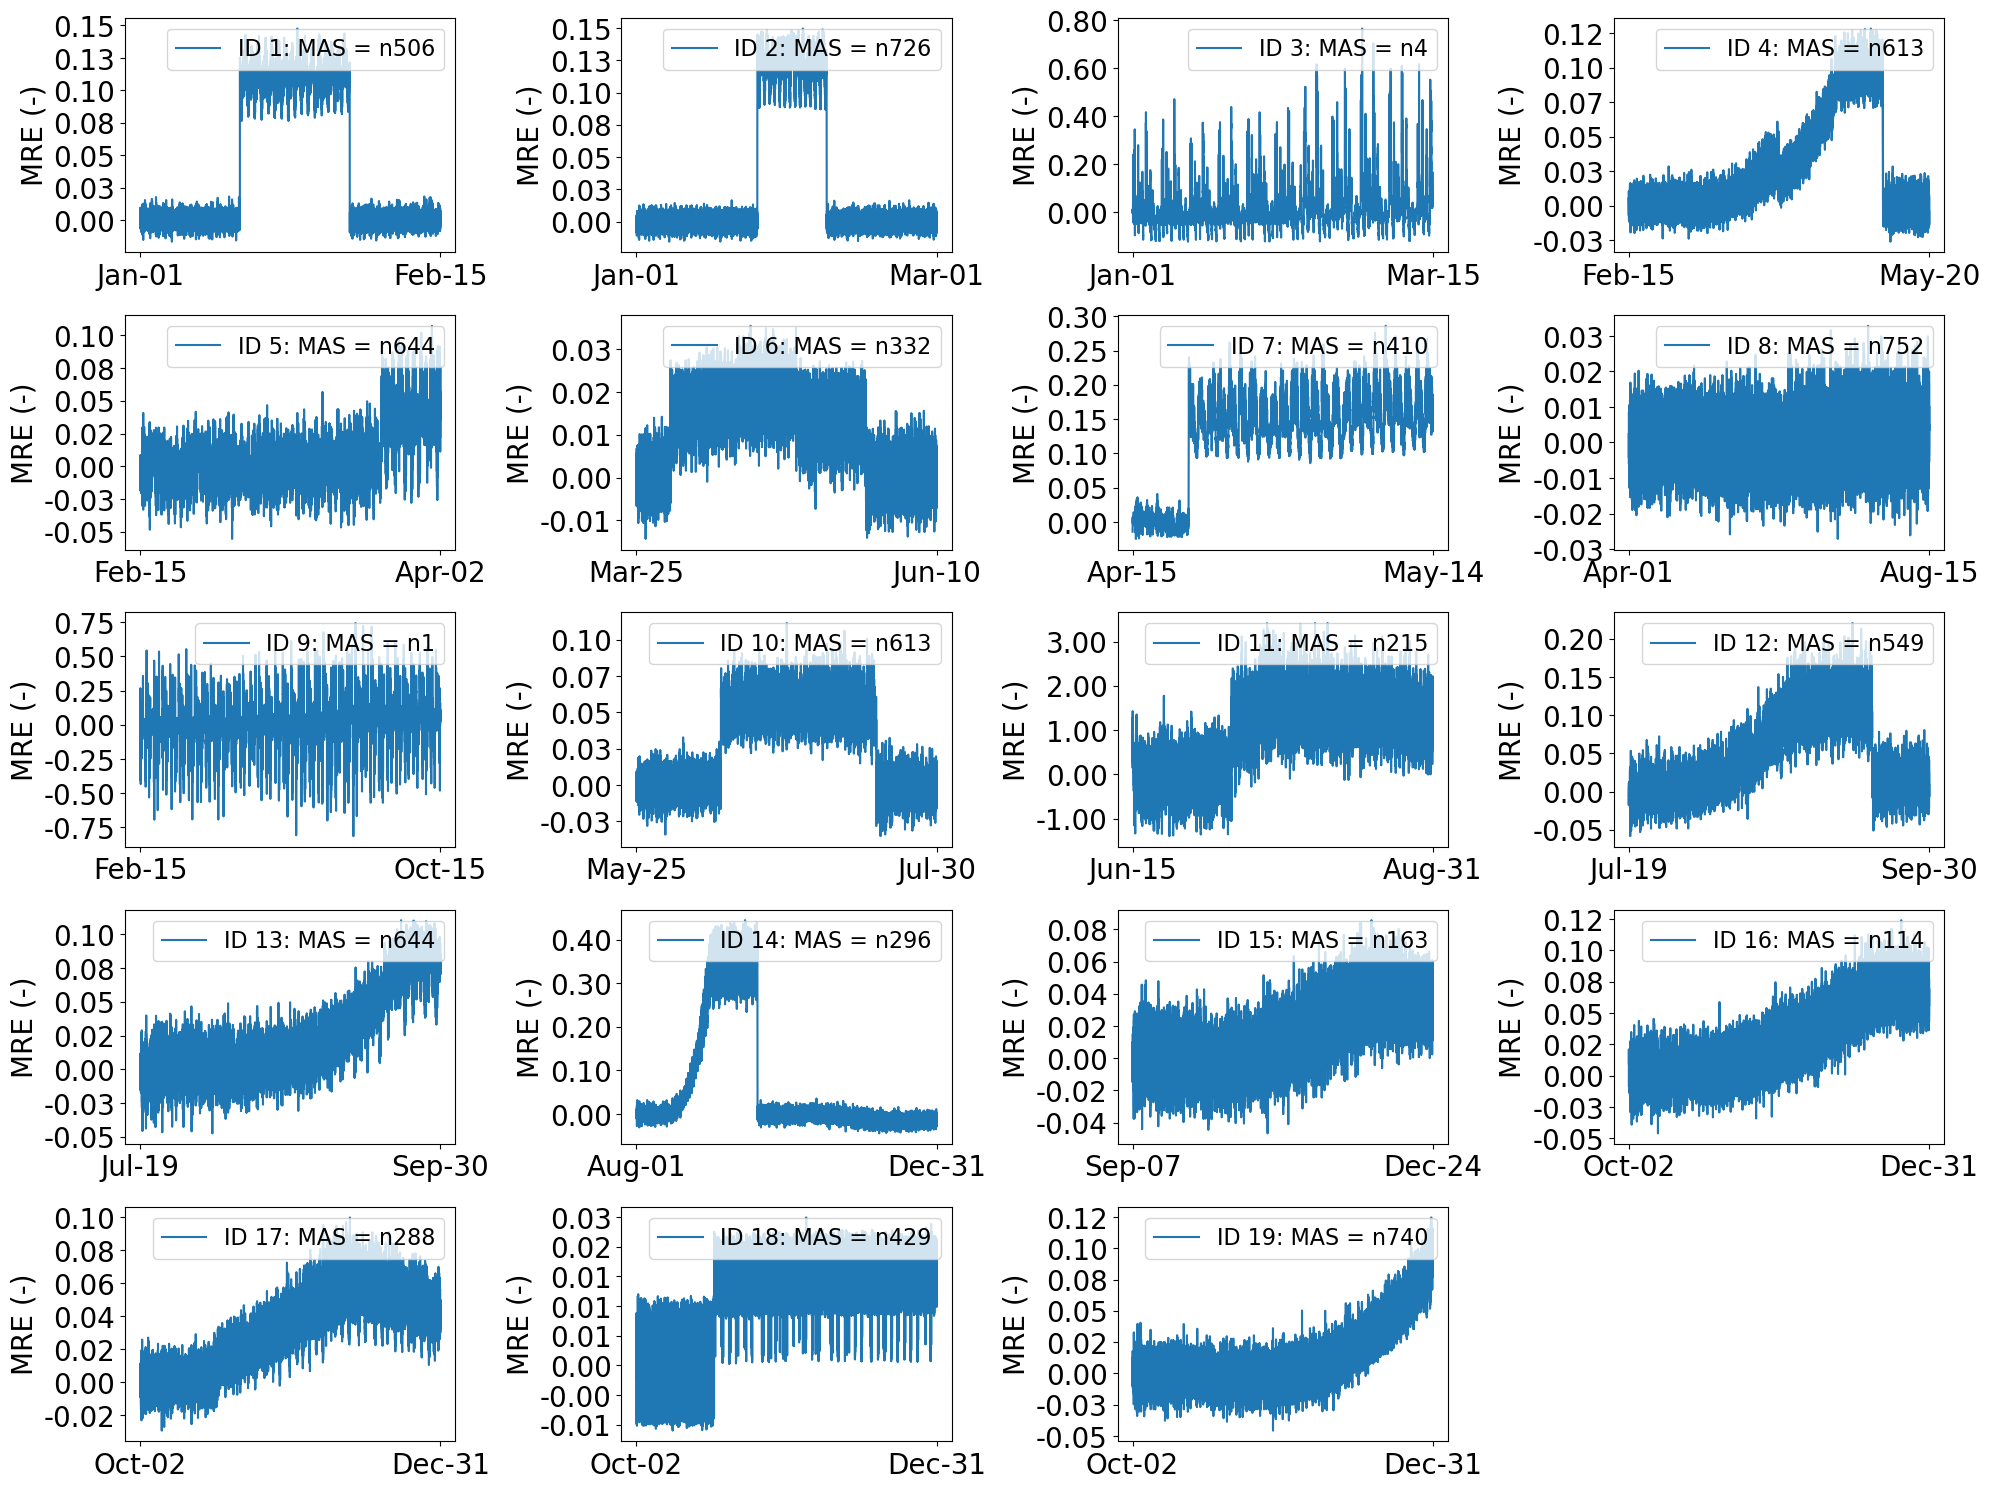

In [93]:
trajectories = pd.DataFrame(dtype=float)
for leak in detections:
    signal = detections[leak]['signal']
    trajectories[leak] = signal[signal.columns[0]]

plt.style.use(['default'])
f = plt.figure(figsize=(20,15))
for i,key in enumerate(list(detections.keys())):
    ax = f.add_subplot(5,4,(i+1))
    ax.plot(trajectories[key][trajectories[key]!=0],label='ID {}: MAS = {}'.format((i+1),detections[key]['MAS']))
    ax.set_xticks([pd.to_datetime(trajectories[key][trajectories[key]!=0].index[0]),
                        pd.to_datetime(trajectories[key][trajectories[key]!=0].index[-1])])
    ax.legend(loc=1,prop={'size':16})
    ax.set_ylabel('MRE (-)',fontsize=20)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 

f.tight_layout()
f.savefig('individual_leaks.png',dpi=300)
plt.show()

In [32]:
for leak in df_overview.index:
    s = df_overview['delta_t_expert'][leak].total_seconds()
    if not np.isnan(s):
        hours, remainder = divmod(s, 3600)
        minutes, seconds = divmod(remainder, 60)
        df_overview.loc[leak,'delta_t_expert_h'] = '{:02}:{:02}'.format(int(hours), int(minutes))
    else:
        df_overview.loc[leak,'delta_t_expert_h'] = np.nan
    
    s = df_overview['delta_t_cusum'][leak].total_seconds()
    if not np.isnan(s):
        hours, remainder = divmod(s, 3600)
        minutes, seconds = divmod(remainder, 60)
        df_overview.loc[leak,'delta_t_cusum_h'] = '{:02}:{:02}'.format(int(hours), int(minutes))
    else:
        df_overview.loc[leak,'delta_t_cusum_h'] = np.nan
        
for pipe in detections:
    if np.isnan(df_overview['delta_t_expert'][pipe].total_seconds()) or df_overview['delta_t_expert'][pipe].total_seconds()<0:
        df_overview.loc[pipe,'delta_v_expert'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)
    else:
        df_overview.loc[pipe,'delta_v_expert'] = np.round(leak_signals[pipe].cumsum().loc[:str(df_overview['leak_start'][pipe]+df_overview['delta_t_expert'][pipe])][-2]/12,1)
    df_overview.loc[pipe,'delta_v_cusum'] = np.round(leak_signals[pipe].cumsum().loc[:str(detections[pipe]['ToD'][0])][-2]/12,1)
    df_overview.loc[pipe,'saved_v_expert'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)-df_overview.loc[pipe,'delta_v_expert']
    df_overview.loc[pipe,'saved_v_cusum'] = np.round(leak_signals[pipe].cumsum()[-2]/12,1)-df_overview.loc[pipe,'delta_v_cusum']
    
df_overview['delta_v_expert'] = pd.to_numeric(df_overview['delta_v_expert']).round(1)
df_overview['delta_v_cusum'] = pd.to_numeric(df_overview['delta_v_cusum']).round(1)
df_overview[['leak_start','leak_type','delta_t_expert_h','delta_v_expert','delta_t_cusum_h','delta_v_cusum']]

,leak_start,leak_type,delta_t_expert_h,delta_v_expert,delta_t_cusum_h,delta_v_cusum
p427,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p654,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p810,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p257,2019-01-01 00:00:00,abrupt,NaN,NaN,NaN,NaN
p523,2019-01-15 23:00:00,abrupt,00:00,0.0,00:00,0.0
p827,2019-01-24 18:30:00,abrupt,00:00,0.0,00:00,0.0
p280,2019-02-10 13:05:00,abrupt,00:35,3.0,116:10,603.5
p653,2019-03-03 13:10:00,incipient,166:50,20.2,222:30,47.9
p710,2019-03-24 14:15:00,abrupt,00:05,0.5,02:00,11.1
p514,2019-04-02 20:40:00,abrupt,00:00,0.0,00:10,2.6


In [33]:
df_overview['leak_start']+df_overview['delta_t_cusum']

p427                   NaT
p654                   NaT
p810                   NaT
p257                   NaT
p523   2019-01-15 23:00:00
p827   2019-01-24 18:30:00
p280   2019-02-15 09:15:00
p653   2019-03-12 19:40:00
p710   2019-03-24 16:15:00
p514   2019-04-02 20:50:00
p331   2019-04-20 10:10:00
p193   2019-06-16 13:25:00
p277   2019-07-15 18:25:00
p142   2019-06-12 19:55:00
p680   2019-07-10 09:50:00
p586   2019-08-06 22:40:00
p721   2019-08-13 13:00:00
p800   2019-08-21 10:30:00
p123   2019-10-24 10:10:00
p455   2019-11-03 18:05:00
p762   2019-10-25 13:30:00
p426   2019-10-25 13:40:00
p879   2019-11-22 08:10:00
dtype: datetime64[ns]

<ipython-input-102-1c956ea7fa59>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
<ipython-input-102-1c956ea7fa59>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
<ipython-input-102-1c956ea7fa59>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)
<ipython-input-102-1c956ea7fa59>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)


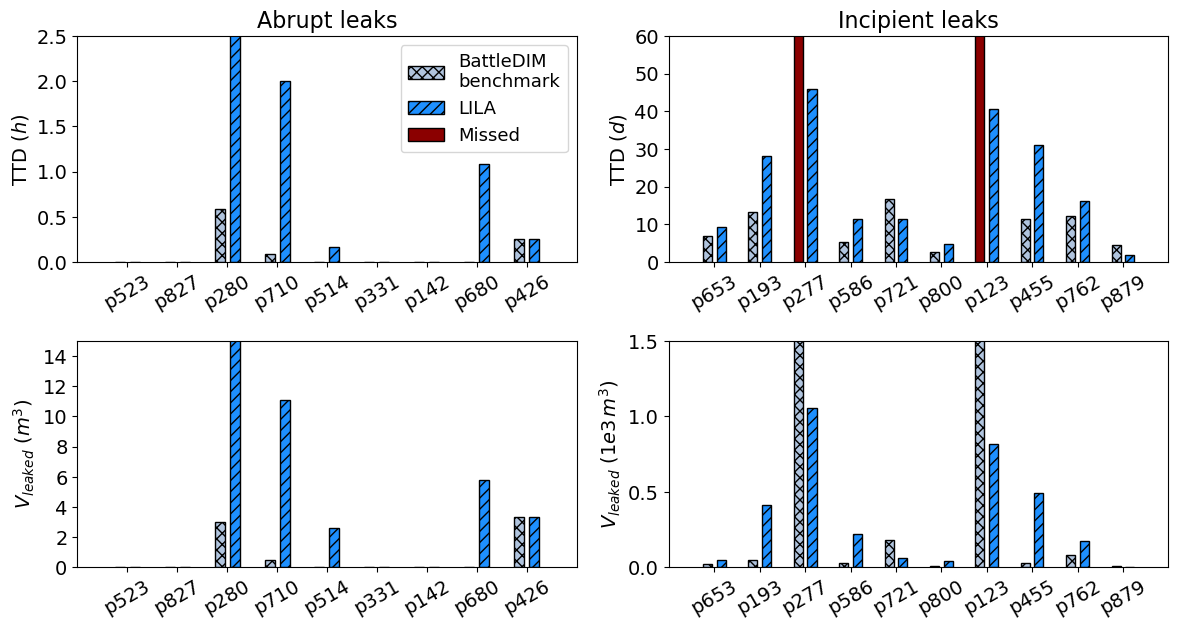

In [102]:
plt.style.use(['default'])
c = ['lightsteelblue','dodgerblue','darkred']

f,axs = plt.subplots(2,2,figsize=(12,6.5))

df_overview_abrupt = df_overview[df_overview['leak_type']=='abrupt'].dropna()
df_overview_incipient = df_overview[df_overview['leak_type']=='incipient']

x_shift = 0.15
x_expert = np.subtract([i for i in range(len(df_overview_abrupt))],x_shift)
x_cusum = np.add([i for i in range(len(df_overview_abrupt))],x_shift)#

ax = axs[0,0]
ax.bar(-100, 1, width=0.38, hatch='xxx', color=c[0], label='BattleDIM\nbenchmark', edgecolor='black')
ax.bar(-100, 1, width=0.38, hatch='///',color=c[1], label='LILA', edgecolor='black')
ax.bar(-100, 1, width=0.38, color=c[2], label='Missed', edgecolor='black')

ax.set_title('Abrupt leaks',fontsize=16)
ax.bar(x_expert , [i.total_seconds()/3600 for i in df_overview_abrupt['delta_t_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i.total_seconds()/3600 for i in df_overview_abrupt['delta_t_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('TTD ($h$)',fontsize=14)
ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_abrupt))])
ax.set_xlim([-1,len(df_overview_abrupt['delta_t_cusum'].index)])
ax.legend(loc=0,prop={'size':13})
ax.set_ylim(0,2.5)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

ax = axs[1,0]
ax.bar(x_expert , [i for i in df_overview_abrupt['delta_v_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i for i in df_overview_abrupt['delta_v_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('$V_{leaked}$ ($m^3$)',fontsize=14)
ax.set_xticklabels(df_overview_abrupt.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_abrupt))])
ax.set_xlim([-1,len(df_overview_abrupt['delta_t_cusum'].index)])
ax.set_ylim(0,15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

x_expert = np.subtract([i for i in range(len(df_overview_incipient))],x_shift)
x_cusum = np.add([i for i in range(len(df_overview_incipient))],x_shift)#

ax = axs[0,1]
ax.set_title('Incipient leaks',fontsize=16)
ax.bar(x_expert , [i.total_seconds()/3600/24 for i in df_overview_incipient['delta_t_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar([2-x_shift] , [200], width=0.2, color=c[2], edgecolor='black') # missed annotation
ax.bar([6-x_shift] , [200], width=0.2, color=c[2], edgecolor='black') # missed annotation
ax.bar(x_cusum, [i.total_seconds()/3600/24 for i in df_overview_incipient['delta_t_cusum']],
       width=0.2, hatch='///',color=c[1], edgecolor='black')
ax.set_ylabel('TTD ($d$)',fontsize=14)
ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_incipient))],)
ax.set_xlim([-1,len(df_overview_incipient['delta_t_cusum'].index)])
ax.set_ylim([0,60])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

ax = axs[1,1]
ax.bar(x_expert , [i/1000 for i in df_overview_incipient['delta_v_expert']],
       width=0.2, hatch='xxx', color=c[0], edgecolor='black')
ax.bar(x_cusum, [i/1000 for i in df_overview_incipient['delta_v_cusum']],
       width=0.2, hatch='///', color=c[1], edgecolor='black')
ax.set_ylabel('$V_{leaked}$ ($1e3\,m^3$)',fontsize=14)
ax.set_xticklabels(df_overview_incipient.index, rotation=30,fontsize=14)
ax.set_xticks([i for i in range(len(df_overview_incipient))])
ax.set_xlim([-1,len(df_overview_incipient['delta_t_cusum'].index)])
ax.set_yticks([0,0.5,1,1.5])
ax.set_ylim(0,1.5)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

f.tight_layout(pad=1.5)
f.savefig('fig_comparison_cp_detection.png',dpi=300)